In [1]:
import random
import time
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

# ---------- Configuration ----------
SENSORS = ['Sensor-A', 'Sensor-B', 'Sensor-C']
THRESHOLD = 100.0
READINGS_PER_SENSOR = 20
DELAY = 0.5  # seconds
fog_data_store = []

# ---------- Simulate Sensor Readings ----------
def get_sensor_reading():
    return round(random.uniform(10, 200), 2)

# ---------- Edge Layer ----------
def edge_process(sensor_id, reading, timestamp):
    if reading > THRESHOLD:
        # Send only anomalous data to fog layer
        print(f"[Edge] 🚨 {sensor_id} reading {reading} µg/m³ at {timestamp} > THRESHOLD")
        fog_forward(sensor_id, reading, timestamp)
    else:
        print(f"[Edge] ✅ {sensor_id} reading {reading} µg/m³ at {timestamp}")

# ---------- Fog Layer ----------
def fog_forward(sensor_id, reading, timestamp):
    # Fog layer: simple aggregation and noise reduction (optional)
    fog_data_store.append({'Sensor': sensor_id, 'PM2.5': reading, 'Timestamp': timestamp})
    cloud_receive_alert(sensor_id, reading, timestamp)

# ---------- Cloud Layer ----------
def cloud_receive_alert(sensor_id, reading, timestamp):
    print(f"    [Cloud] Alert received from {sensor_id}: {reading} µg/m³ at {timestamp}")

# ---------- Real-Time Monitoring ----------
def run_simulation():
    print("🌐 Starting Multi-Sensor Edge-Fog-Cloud Simulation...\n")
    all_readings = []

    for i in range(READINGS_PER_SENSOR):
        clear_output(wait=True)
        print(f"⏱️ Iteration {i + 1} of {READINGS_PER_SENSOR}\n")

        timestamp = datetime.now().strftime('%H:%M:%S')

        for sensor_id in SENSORS:
            reading = get_sensor_reading()
            all_readings.append({'Sensor': sensor_id, 'PM2.5': reading, 'Timestamp': timestamp})
            edge_process(sensor_id, reading, timestamp)

        # Live Plotting
        plot_readings(all_readings)
        time.sleep(DELAY)

    print("\n✅ Simulation Complete")

# ---------- Plotting ----------
def plot_readings(data):
    df = pd.DataFrame(data)
    plt.figure(figsize=(10, 5))
    for sensor in SENSORS:
        sensor_df = df[df['Sensor'] == sensor]
        plt.plot(sensor_df['Timestamp'], sensor_df['PM2.5'], label=sensor, marker='o')

    plt.axhline(y=THRESHOLD, color='red', linestyle='--', label='Threshold')
    plt.title('PM2.5 Readings Over Time')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.xlabel('Timestamp')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


⏱️ Iteration 20 of 20

[Edge] 🚨 Sensor-A reading 195.82 µg/m³ at 11:28:52 > THRESHOLD
    [Cloud] Alert received from Sensor-A: 195.82 µg/m³ at 11:28:52
[Edge] 🚨 Sensor-B reading 177.04 µg/m³ at 11:28:52 > THRESHOLD
    [Cloud] Alert received from Sensor-B: 177.04 µg/m³ at 11:28:52
[Edge] 🚨 Sensor-C reading 109.64 µg/m³ at 11:28:52 > THRESHOLD
    [Cloud] Alert received from Sensor-C: 109.64 µg/m³ at 11:28:52


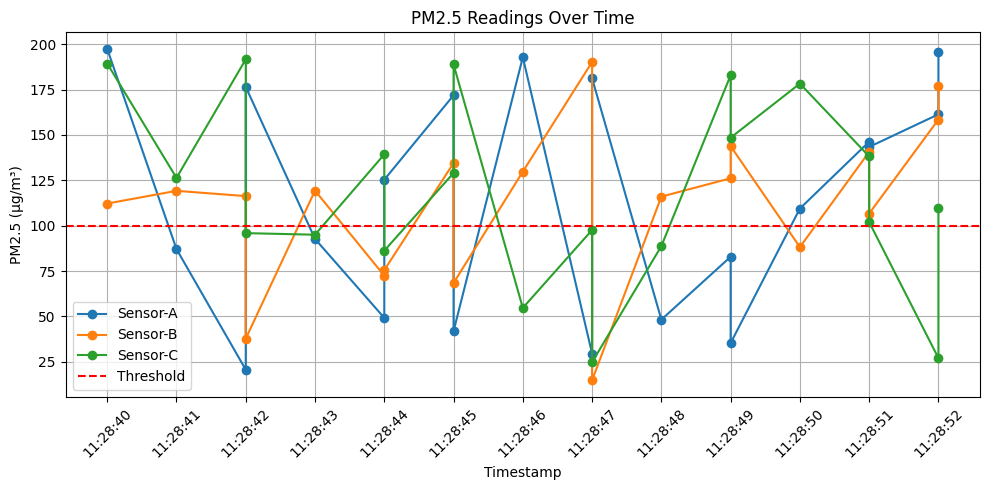


✅ Simulation Complete


In [2]:
run_simulation()
